In [1]:
# Library 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import platform
import subprocess
import warnings
warnings.filterwarnings("ignore")

In [2]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/mnt/e/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

path = ds_path + 'AI Specialist Lesson 06'
os.chdir(ds_path)

if not os.path.isdir(path):
    import subprocess
    subprocess.run(["unrar", "x", "AI Specialist Lesson 06.rar"])

os.chdir(path)

In [3]:
data = pd.read_csv('uci-secom.csv')
print(data.shape)
display(data.head())

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [5]:
# Su dung gia tri gay bat thuong thay the cho NaN
# Muc tieu bai toan la nhan dien defect cang nhieu cang tot (ke ca sai)
# Khong the fill missing theo loi thong thuong (mean, mode, correlation,...)
anomalyValue = 0
data = data.fillna(anomalyValue)
data.isnull().any().any()

False

<AxesSubplot:>

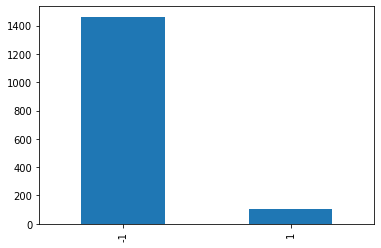

In [9]:
data['Pass/Fail'].value_counts().plot(kind='bar')

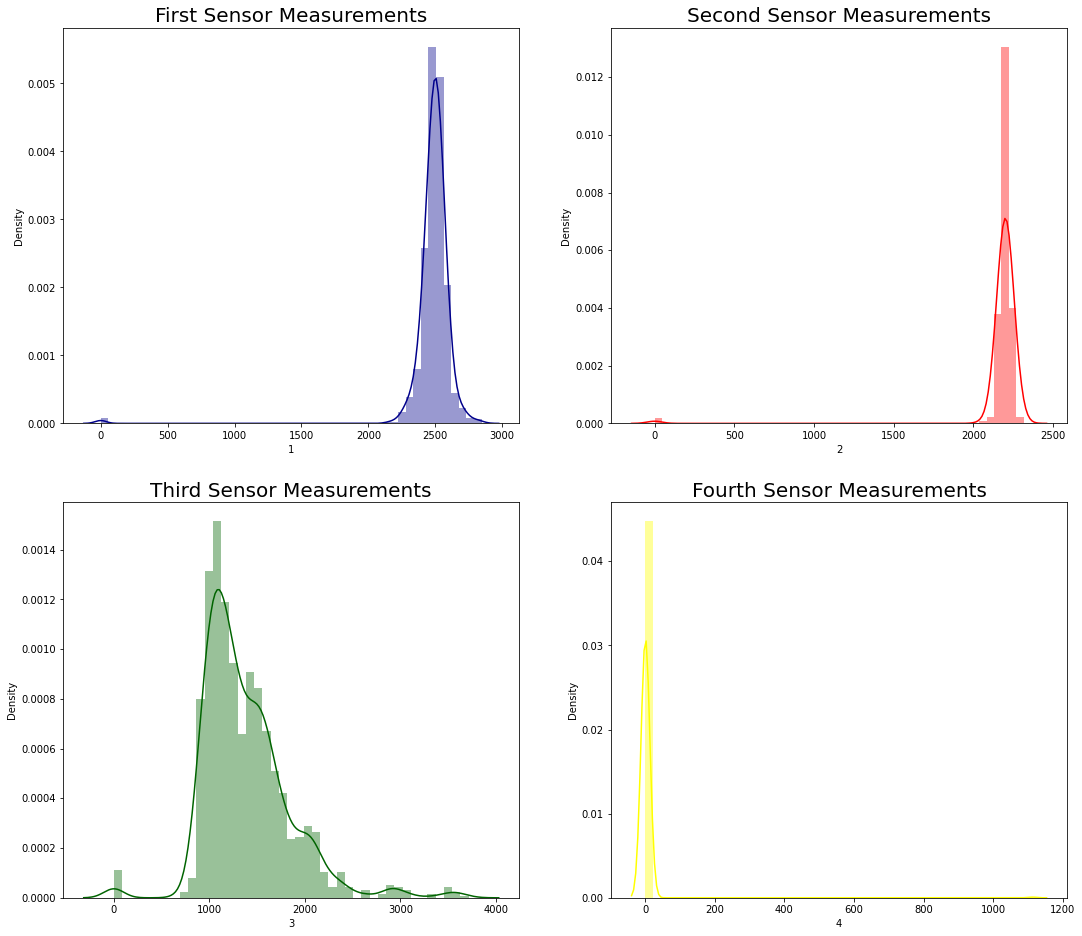

In [10]:
# distribution plot to see first four column's distribution
# Sensor 3 khong theo phan bo Gauss
# Co the dung np.log xu ly skewness
plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(data['1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(data['2'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(data['3'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(data['4'], color = 'yellow')
plt.title('Fourth Sensor Measurements', fontsize = 20)

plt.show()

In [11]:
data = data.drop('Time', axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


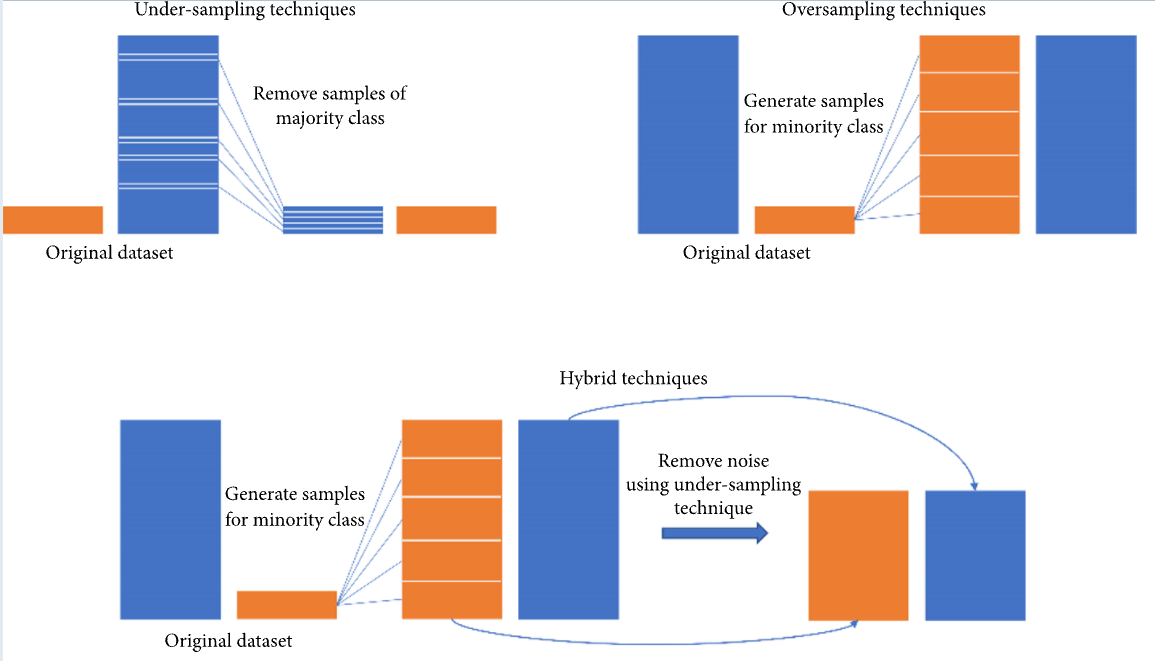

In [13]:
display(Image(filename='Unbalanced Data.png'))

In [14]:
np.random.seed(1)

In [15]:
target = "Pass/Fail"
target_idx = 590

In [26]:
# Data under-sampling
data_us = data.copy()
failed_indices = np.array(data_us[data_us[target] == 1].index)
num_failed_indices = len(failed_indices)
print(num_failed_indices)
print(failed_indices)

104
[   2   10   11   14   23   38   40   45   48   49   50   57   58   62
   64   82   96  115  131  154  157  158  167  169  180  182  186  188
  189  218  222  231  235  236  238  240  241  243  244  273  277  282
  291  294  321  323  326  327  336  344  351  368  373  392  406  424
  441  448  495  508  518  576  583  601  605  634  709  795  797  826
  831  871  914  924  926  929 1029 1062 1144 1151 1185 1189 1211 1227
 1238 1241 1242 1254 1302 1303 1324 1325 1327 1328 1329 1342 1343 1363
 1364 1365 1400 1438 1443 1519]


In [19]:
normal_indices = np.array(data_us[data_us[target] == -1].index)
num_normal_indices = len(normal_indices)
print(num_normal_indices)

1463


In [20]:
# random index normal class with size equal length of failed class
# replace=False to avoid duplicate indices
random_normal_indices = np.random.choice(
    normal_indices,
    size=num_failed_indices,
    replace=False)

len(random_normal_indices)

104

In [23]:
under_sample = np.concatenate([failed_indices, random_normal_indices])
print(len(under_sample))

208


<AxesSubplot:>

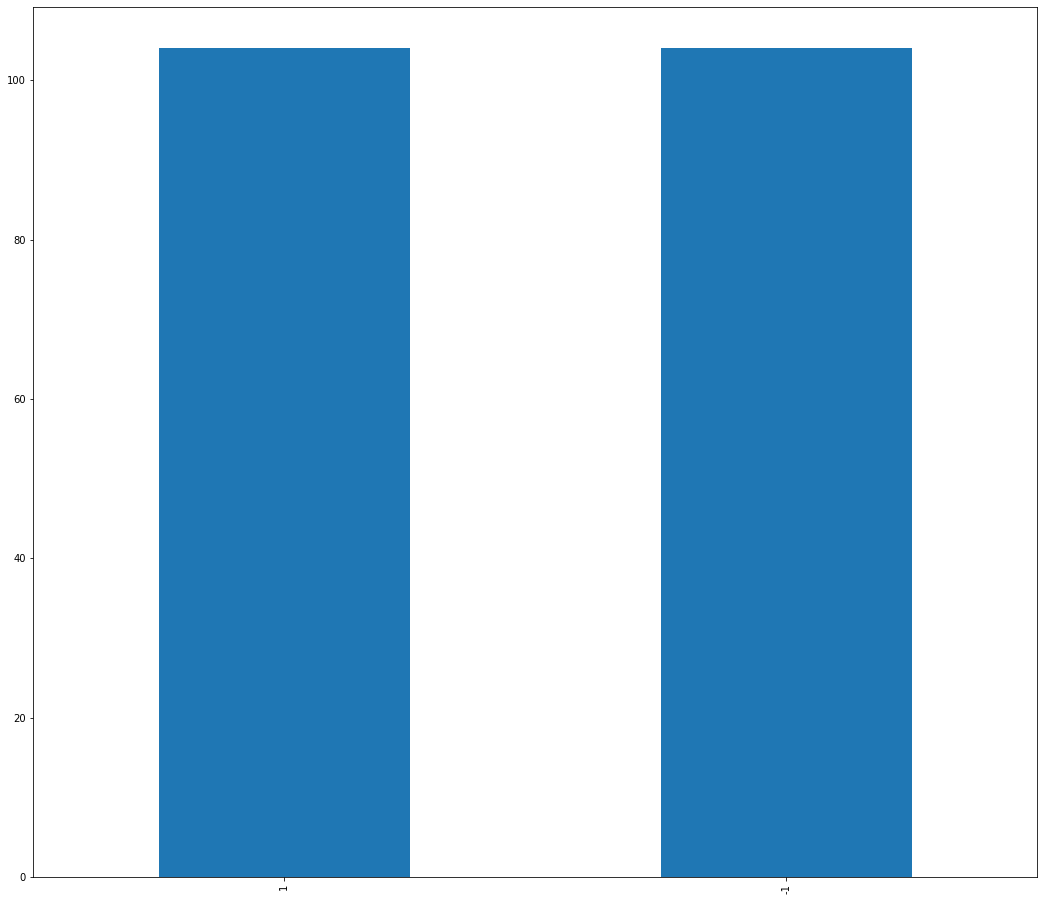

In [27]:
data_us = data_us.iloc[under_sample, :]
data_us['Pass/Fail'].value_counts().plot(kind='bar')

In [28]:
data_us.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5144,-0.0190,...,57.8122,0.4925,0.0158,0.0041,3.2115,0.0355,0.0205,0.0071,57.8122,1
11,2928.84,2479.40,2196.2111,1605.7578,0.9959,100.0,97.9156,0.1257,1.4690,0.0170,...,75.5077,0.4987,0.0427,0.0092,8.5646,0.0370,0.0279,0.0081,75.5077,1
14,2963.97,2629.48,2224.6222,947.7739,1.2924,100.0,104.8489,0.1197,1.4474,0.0144,...,142.9080,0.5077,0.0094,0.0026,1.8483,0.0202,0.0289,0.0084,142.9080,1
23,2884.74,2514.54,2160.3667,899.9488,1.4022,100.0,105.4978,0.1240,1.5585,-0.0317,...,216.8869,0.4982,0.0099,0.0027,1.9771,0.0098,0.0213,0.0077,216.8869,1


In [29]:
# Training
X = data_us.iloc[:, :target_idx]
y = data_us.iloc[:, target_idx]

In [30]:
from sklearn.model_selection import train_test_split

X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train_us.shape)
print(X_test_us.shape)
print(y_train_us.shape)
print(y_test_us.shape)

(166, 590)
(42, 590)
(166,)
(42,)


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train_us)
X_test = sc.transform(X_test_us)

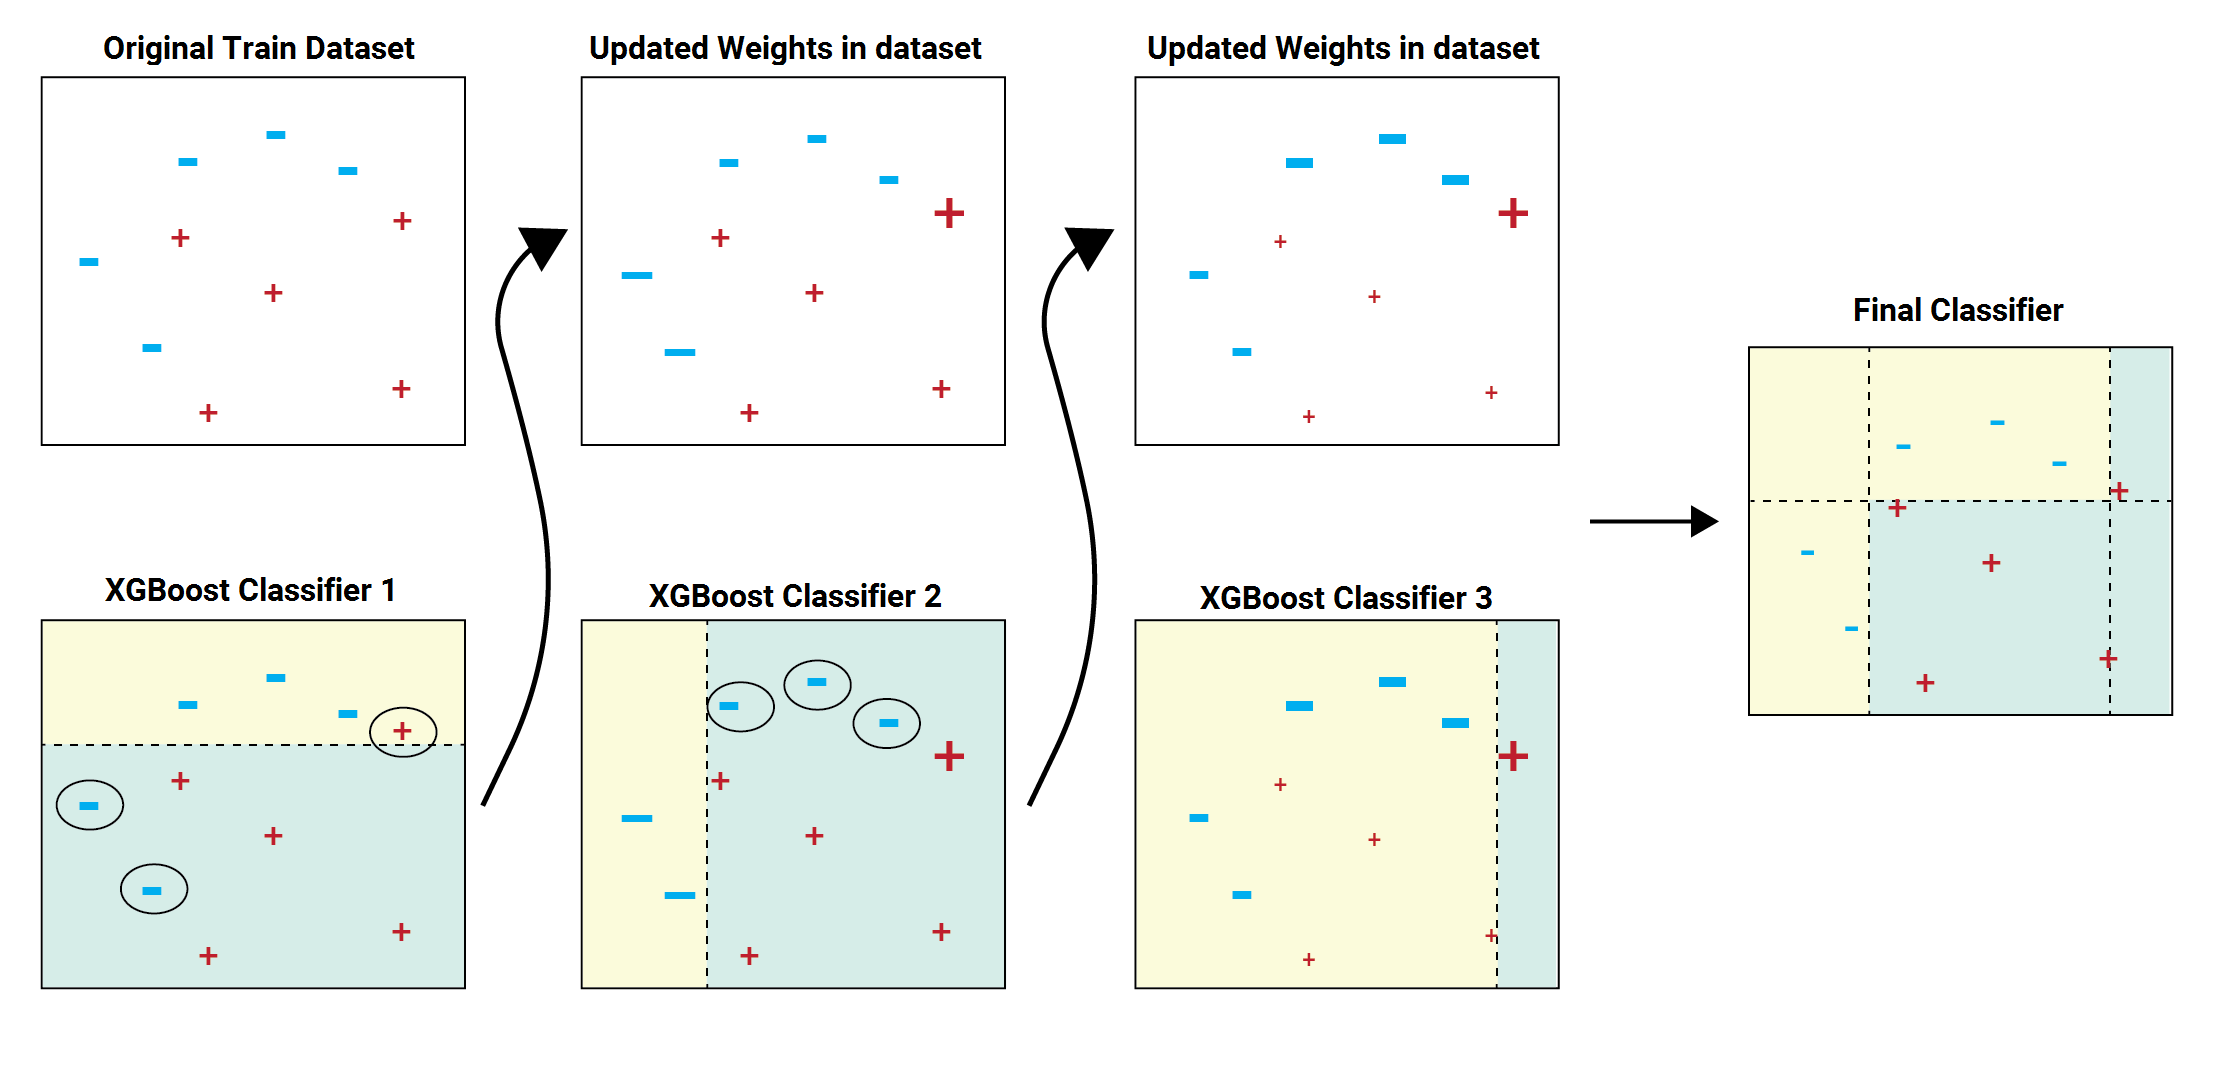

In [32]:
display(Image('XGBoost.png'))

In [34]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train_us)
y_pred_us = model.predict(X_test)

[[13  7]
 [ 5 17]]


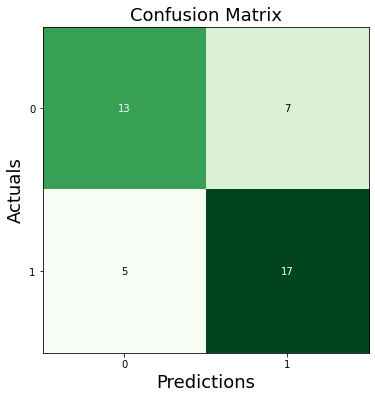

In [35]:
# evaluation
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_us, y_pred_us)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [36]:
# feature important
xgb_fea_imp=pd.DataFrame(list(model.get_booster().get_fscore().items()), 
                         columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp

,feature,importance
30,f59,9.0
139,f488,9.0
20,f35,8.0
142,f510,8.0
62,f148,7.0
...,...,...
85,f222,1.0
84,f218,1.0
82,f213,1.0
81,f212,1.0


In [37]:
y_weights = pd.DataFrame(data.iloc[:,target_idx])
display(y_weights.head())
print(y_weights.shape)
display(y_weights.value_counts())

,Pass/Fail
0,-1
1,-1
2,1
3,-1
4,-1


(1567, 1)


Pass/Fail
-1           1463
 1            104
dtype: int64

In [38]:
from sklearn.utils.class_weight import compute_sample_weight
y_weights["Weighted"] = compute_sample_weight("balanced",y_weights["Pass/Fail"])
display(y_weights.head())
display(y_weights.value_counts())

,Pass/Fail,Weighted
0,-1,0.535543
1,-1,0.535543
2,1,7.533654
3,-1,0.535543
4,-1,0.535543


Pass/Fail  Weighted
-1         0.535543    1463
 1         7.533654     104
dtype: int64

In [39]:
w_array = y_weights.loc[y_train_us.index]["Weighted"].values
print(len(w_array))
print(w_array[:10])

166
[7.53365385 0.5355434  0.5355434  0.5355434  7.53365385 7.53365385
 0.5355434  0.5355434  0.5355434  0.5355434 ]


In [40]:
model = XGBClassifier(eval_metric="logloss")
model.fit(X_train, y_train_us, sample_weight= w_array)
y_pred_us = model.predict(X_test)

[[ 5 15]
 [ 0 22]]


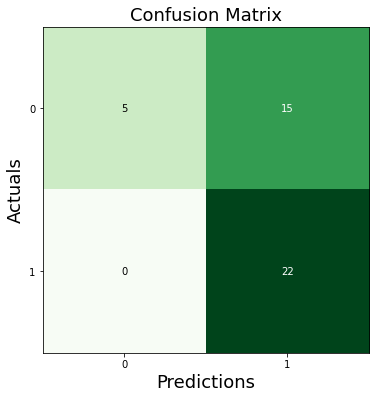

In [41]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_us, y_pred_us)
print(conf_matrix)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()